In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3
from util import *
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
data = np.load("../out.npz")
for key in data.keys():
    if data[key].shape:
        print(key, ": ", data[key].shape, end=" / ")
    else:
        print(key, ": ", data[key], end=" / ")

duration :  500 / reg_coef :  9.0 / search_mse :  (10,) / link_delay :  30ms / input_num :  2 / cwnd_raw :  (59,) / init_time :  100.0 / training_time :  300.0 / time :  (5000,) / cwnd_src_dst :  (59, 2) / cwnd :  (59, 5000) / topology :  (59, 4) / search_regcoef :  (10,) / k :  4.0 / output :  (5000,) / link_queue :  3 / weight :  (59,) / input :  (2, 5000) / link_bps :  10Mb / esn_dt :  0.1 / input_raw :  (83, 2) / mse :  0.2392736560992174 / target :  (5000,) / N :  16 / 

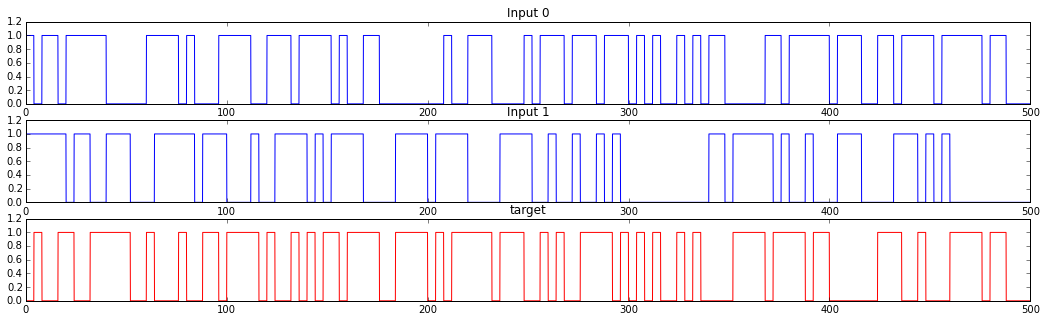

In [105]:
plt.figure(figsize=(18,5))
n = 1 + len(data['input'])
for i, indata in enumerate(data['input']):
    plt.subplot(n, 1, 1+i)
    plt.plot(data['time'], indata, 'b')
    plt.title("Input %d" % i)
    plt.ylim(0,1.2)
plt.subplot(n, 1, n)
plt.plot(data['time'], data['target'], 'r')
plt.title('target')
plt.ylim(0,1.2)
plt.show()

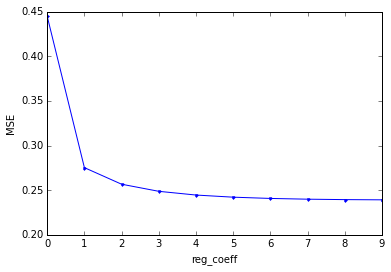

In [106]:
plt.plot(data['search_regcoef'], data['search_mse'], '.-')
plt.xlabel('reg_coeff')
plt.ylabel('MSE')
plt.show()

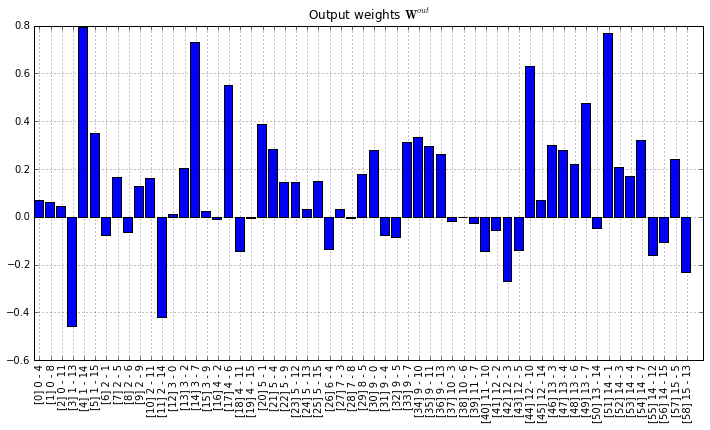

In [107]:
plt.figure(figsize = (12, 6))

#plt.figure(0).clear()
plt.bar(range(len(data['weight'])), data['weight'])
plt.title('Output weights $\mathbf{W}^{out}$')
xtick_idx = np.arange(len(data['weight']))+0.5
xtick_label = [ "[%d] %d - %d"%(i, s, d) for i, (s, d) in enumerate(data['cwnd_src_dst'])]
plt.xticks(xtick_idx, xtick_label, rotation=90)
plt.grid()
#mpld3.display()
plt.show()

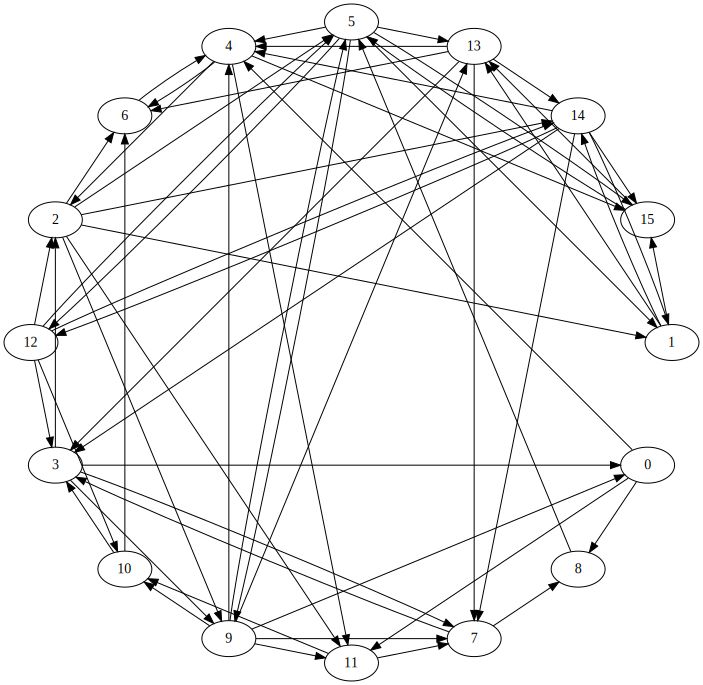

In [110]:
from graphviz import Digraph
dot = Digraph(engine='circo')
for n in range(data['N']):
    dot.node(str(n))
for src, dst, input_channel, neg_pos in data['topology']:
    dot.edge(str(src), str(dst))
dot

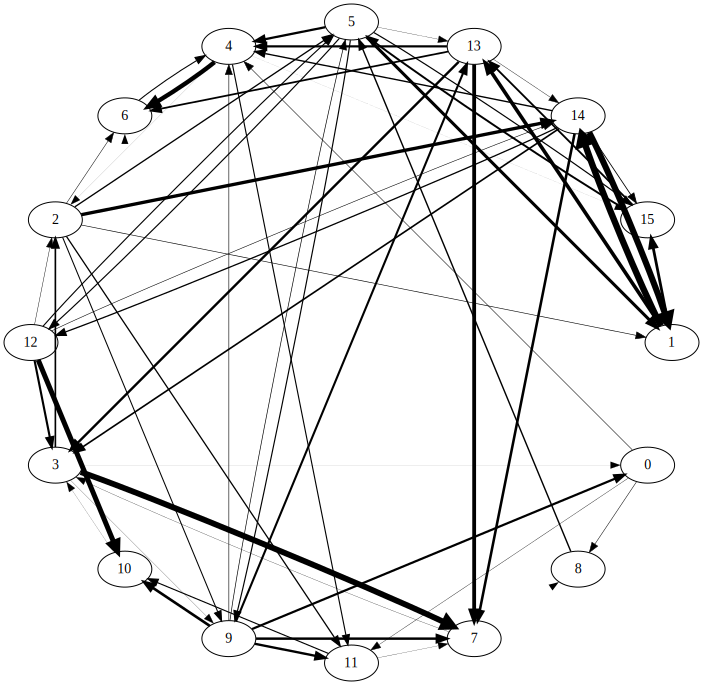

In [112]:
dot = Digraph(engine='circo')
for n in range(data['N']):
    dot.node(str(n))
for w, (s, d) in zip(data['weight'], data['cwnd_src_dst']):
    dot.edge(str(s), str(d), penwidth=str(np.abs(w)*8))
dot

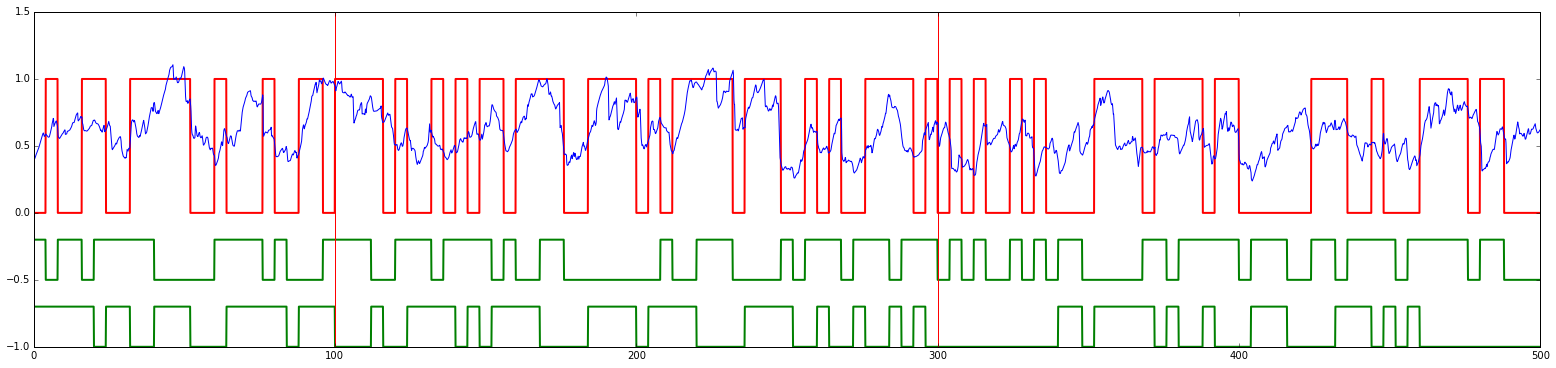

In [82]:
plt.figure(figsize=(27, 6))


plt.plot(data['time'], data['target'], 'r', linewidth=2)

for i, indata in enumerate(data['input']):
    plt.plot(data['time'], (indata*0.3-0.5*(i+1)), 'g', linewidth=2)
    
plt.axvline(x=data["init_time"], color='red')
plt.axvline(x=data["training_time"], color='red')

plt.plot(data['time'], data['output'], 'b')

# combolution
# filter = np.ones(100)/100.0
# C = np.convolve(Y[0, :], filter, 'valid')
# plt.plot(dt * np.arange(C.shape[0]), C, 'b', linewidth=2)
#mpld3.display()
#plt.xlim(10, 40)
#plt.xlim(0, 1010)
plt.show()

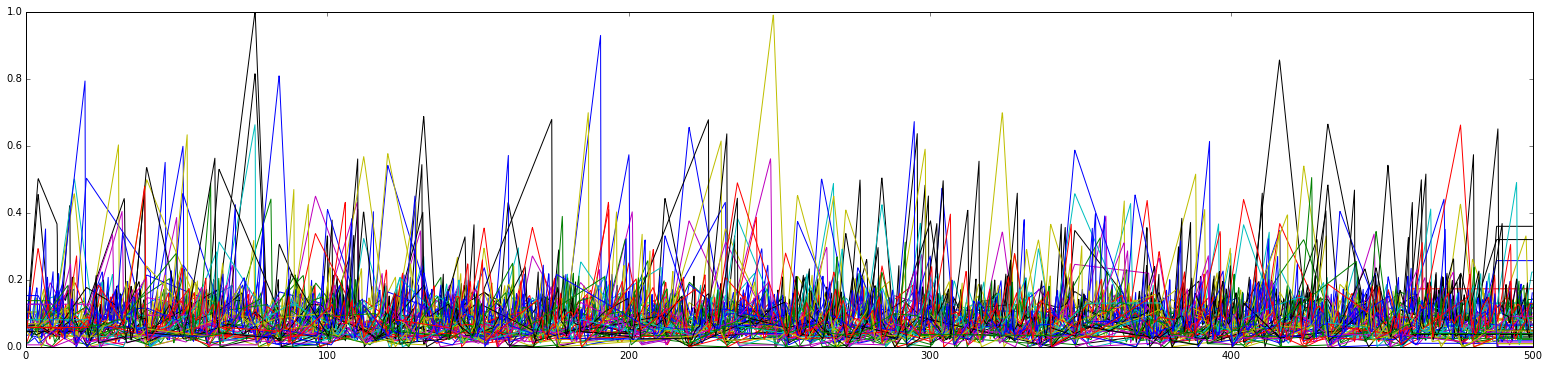

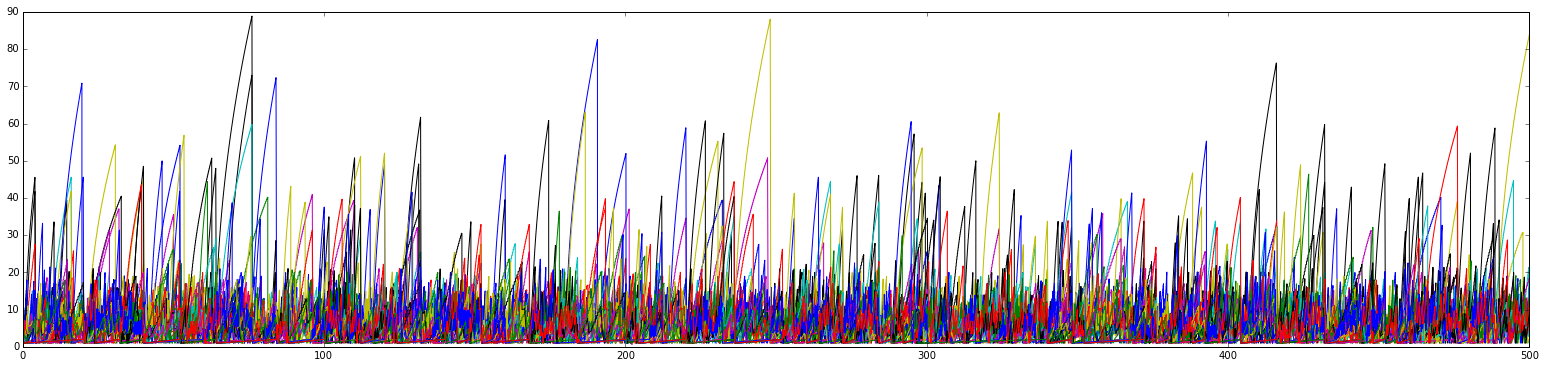

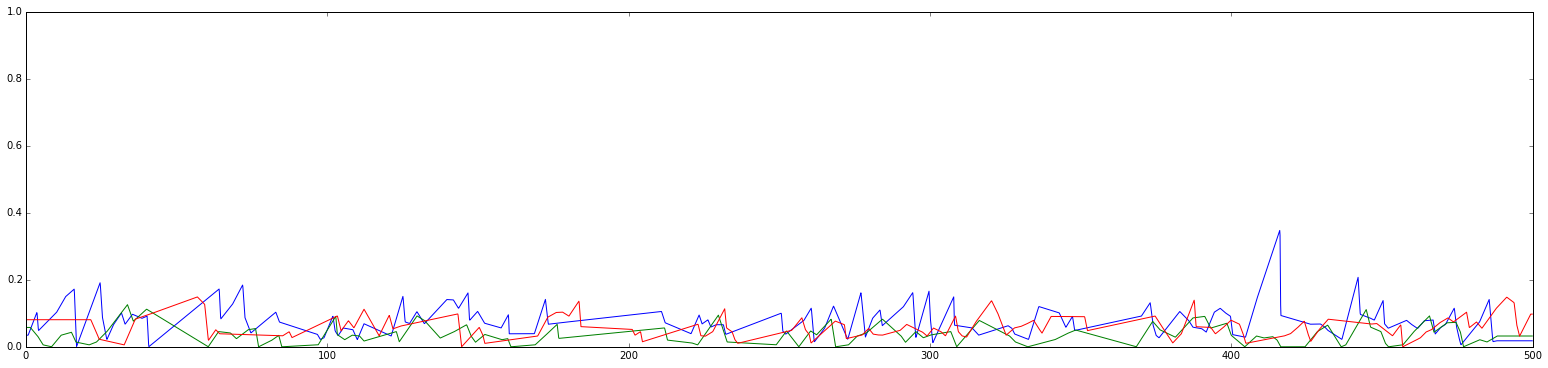

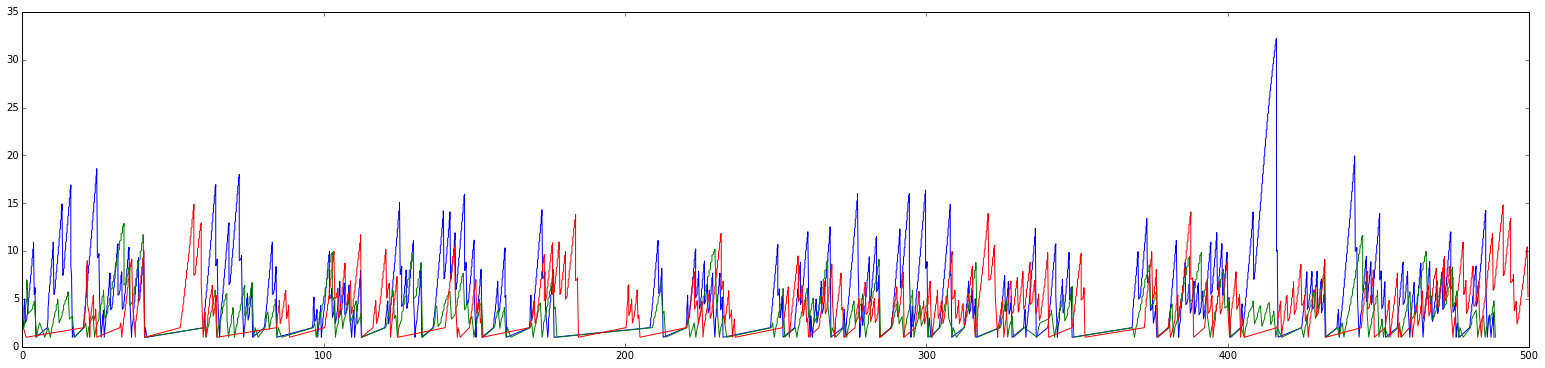

In [83]:
plot_all_cwnd(data)
plot_all_cwnd(data, raw=True)
plot_cwnd(data, [0,1,2])
plot_cwnd(data, [0,1,2],  raw=True)